Sprechen!
Stop!
Start of Audio: 27366


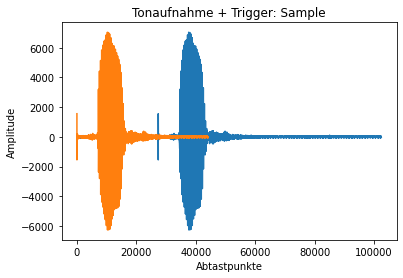

Sprechen!
Stop!
Start of Audio: 23097


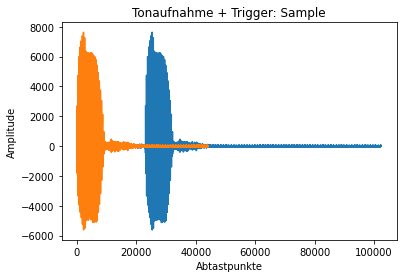

Sprechen!
Stop!
Start of Audio: 19632


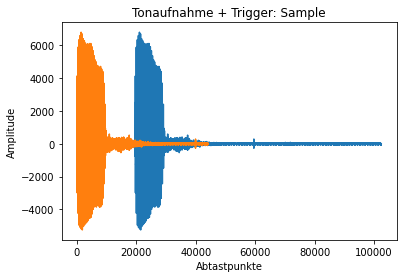

Sprechen!
Stop!
Start of Audio: 19133


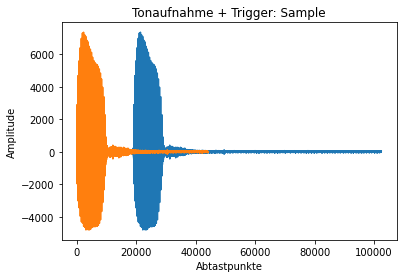

Sprechen!
Stop!
Start of Audio: 19923


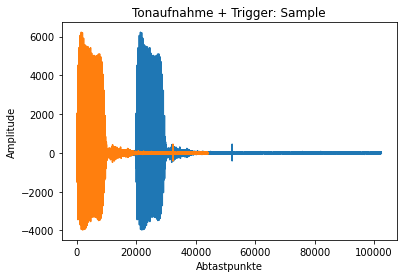

Sprechen!
Stop!
Start of Audio: 16724


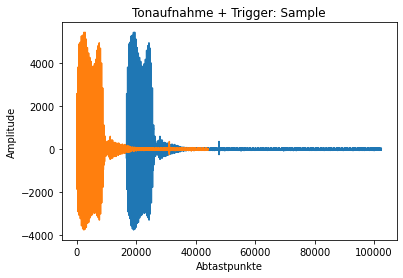

Sprechen!
Stop!
Start of Audio: 17088


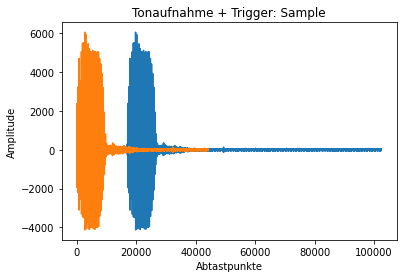

Sprechen!
Stop!
Start of Audio: 21711


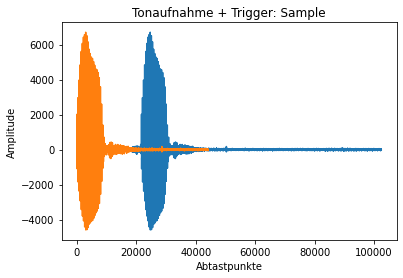

Sprechen!
Stop!
Start of Audio: 25186


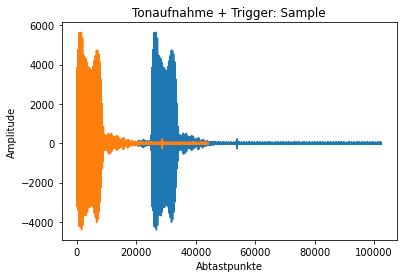

Sprechen!
Stop!
Start of Audio: 23351


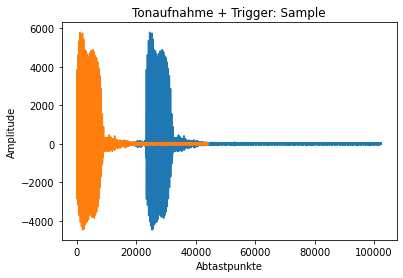

In [11]:
import numpy as np
import pyaudio
import numpy
import time
import matplotlib.pyplot as plt

name = "max"
befehl = "hoch"
filename = name + "_" + befehl
filepath = "audiodateien/" + filename
filepathtrigger = "audiodateien/trigger/" + filename 
FORMAT = pyaudio.paInt16
SAMPLEFREQ = 44100
FRAMESIZE = 1024
NOFFRAMES = 100

for i in range (1, 11):
    p = pyaudio.PyAudio()
    print('Sprechen!')
    stream = p.open(format=FORMAT,channels=1,rate=SAMPLEFREQ,input=True,frames_per_buffer=FRAMESIZE)

    data = stream.read(NOFFRAMES*FRAMESIZE)
    decoded = numpy.frombuffer(data, np.int16)

    stream.stop_stream()
    stream.close()
    p.terminate()
    print('Stop!')

    count = 0
    start = 0
    end = 0
    for k in decoded[0:len(decoded)]:
        if k > 500:
            start = count
            print("Start of Audio: " + str(start))
            break
        count += 1

    trigger = decoded[start:start + SAMPLEFREQ] # 0 bis SAMPLEFREQ ist 1 Sekunde



    plt.plot(decoded)
    plt.plot(trigger)
    plt.xlabel('Abtastpunkte')
    plt.ylabel('Amplitude')
    plt.title("yes")
    plt.title("Tonaufnahme + Trigger: Sample")
    plt.show()

    np.save(filepath + f"{i}",decoded)
    np.save(filepathtrigger + f"{i}",trigger)